In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_136312\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("features_MFCC_MEL.csv")

In [3]:
data1 = data.loc[data['labels'] == 'anger'][:9786]
data2 = data.loc[data['labels'] == 'disgust'][:9786]
data3 = data.loc[data['labels'] == 'fear'][:9786]
data4 = data.loc[data['labels'] == 'happiness'][:9786]
data5 = data.loc[data['labels'] == 'neutral'][:9786]
data6 = data.loc[data['labels'] == 'sadness'][:9786]

In [4]:
total_data = pd.concat([data1, data2, data3, data4, data5, data6])

In [5]:
total_data.reset_index(inplace=False)

,index,0,1,2,3,4,5,6,7,8,...,139,140,141,142,143,144,145,146,147,labels
0,0,-415.361755,72.224693,4.757228,22.024660,-7.468746,9.577067,-8.639965,15.034519,-23.448441,...,0.000212,0.000123,0.000132,0.000080,0.000051,0.000045,0.000029,0.000013,9.703022e-07,anger
1,1,-365.741952,40.318852,15.552652,12.729224,1.252757,-0.082165,0.424535,3.310411,-9.541607,...,0.000338,0.000243,0.000259,0.000205,0.000193,0.000190,0.000165,0.000152,1.357022e-04,anger
2,2,-484.022614,66.650978,6.307154,16.172136,-6.870571,5.009261,-7.100348,10.470600,-22.409895,...,0.000133,0.000096,0.000027,0.000026,0.000022,0.000012,0.000011,0.000005,3.741708e-07,anger
3,3,-394.473877,76.370163,2.615793,16.192711,-16.572311,9.222215,-0.099308,18.952885,-27.506077,...,0.000189,0.000110,0.000112,0.000066,0.000065,0.000056,0.000040,0.000020,1.373281e-06,anger
4,4,-330.903450,39.353837,13.862872,4.841933,-4.863433,-0.164009,6.280050,6.406574,-9.553326,...,0.000573,0.000463,0.000446,0.000405,0.000429,0.000412,0.000402,0.000374,3.284955e-04,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58711,21397,-305.720146,92.157250,-0.700726,2.595829,-11.683842,-0.651956,-1.318332,-17.506849,-8.080908,...,0.000178,0.000221,0.000225,0.000235,0.000249,0.000315,0.000849,0.000698,1.157953e-04,sadness
58712,21398,-406.075592,115.639992,-8.642056,9.230587,-12.310991,2.875495,-8.832375,-24.322306,-8.718390,...,0.000008,0.000016,0.000038,0.000042,0.000049,0.000037,0.000032,0.000036,7.985508e-06,sadness
58713,21426,-317.955658,90.360344,-10.365887,8.286254,-5.905339,-0.670596,6.858087,-17.610382,-2.092952,...,0.000288,0.000349,0.000341,0.000294,0.000328,0.000337,0.000742,0.000550,4.360123e-05,sadness
58714,21427,-288.938675,67.880069,-4.849575,4.040531,-3.429927,-0.741835,3.803617,-12.752042,-2.316109,...,0.000449,0.000525,0.000498,0.000455,0.000500,0.000490,0.000912,0.000709,1.958218e-04,sadness


In [6]:
X = total_data.iloc[: ,:-1].values
Y = total_data['labels'].values

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
#케라스 불러오기
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization


In [8]:
# 다중 클래스 분류하기위해 Y설정
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
# 훈련데이터, 테스트데이터 분리
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44037, 148), (44037, 6), (14679, 148), (14679, 6))

In [10]:
# 훈련 및 테스트데이터 갯수 확인
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44037, 148), (44037, 6), (14679, 148), (14679, 6))

In [11]:
# 데이터의 차원 모델에 맞게 통일 
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((44037, 148, 1), (44037, 6), (14679, 148, 1), (14679, 6))

In [12]:
x_train.shape[0]

44037

In [2]:
x_train[1,:,:]

NameError: name 'x_train' is not defined

In [14]:
# version1 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# loss: 1.0725 - accuracy: 0.5635 - val_loss: 1.5111 - val_accuracy: 0.4276 - lr: 0.0010
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 148, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 74, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 74, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 19, 128)          0

In [15]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 15s 11ms/step - loss: 1.7508 - accuracy: 0.2288 - val_loss: 1.6736 - val_accuracy: 0.2799 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 6s 9ms/step - loss: 1.6668 - accuracy: 0.2801 - val_loss: 1.6174 - val_accuracy: 0.3094 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 6s 9ms/step - loss: 1.6366 - accuracy: 0.2981 - val_loss: 1.5913 - val_accuracy: 0.3280 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 6s 9ms/step - loss: 1.6118 - accuracy: 0.3124 - val_loss: 1.5792 - val_accuracy: 0.3322 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 6s 9ms/step - loss: 1.5921 - accuracy: 0.3240 - val_loss: 1.5555 - val_accuracy: 0.3448 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 6s 9ms/step - loss: 1.5717 - accuracy: 0.3335 - val_loss: 1.5459 - val_accuracy: 0.3517 - lr: 0.0010
Epoch 7/100
689/689 [==============================] - 6s 9ms/

In [16]:
model.save("sound_classifier_model_MFCC_MEL(version1).h5")


459/459 [==============================] - 2s 3ms/step - loss: 1.5111 - accuracy: 0.4276
Accuracy of our model on test data :  42.76176989078522 %


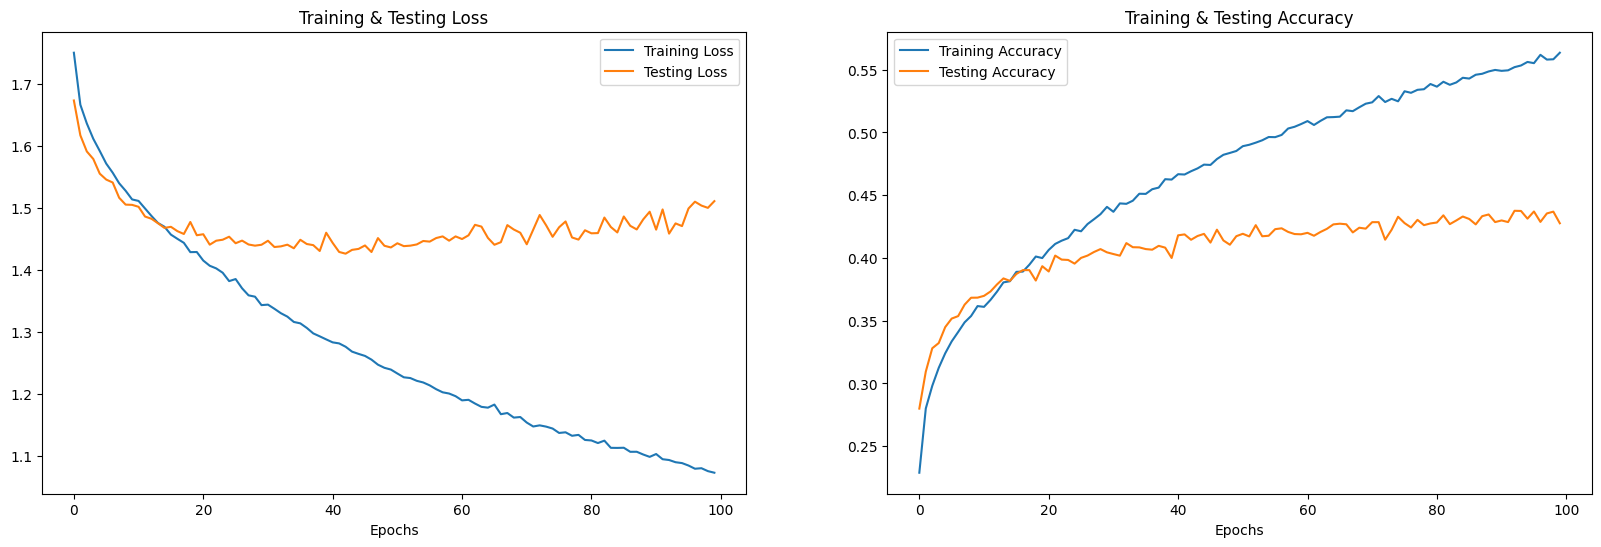

In [17]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [18]:
# 테스트데이터 적용
pred_test = model.predict(x_test)
pred_test
y_pred = encoder.inverse_transform(pred_test)
y_test2 = encoder.inverse_transform(y_test)

459/459 [==============================] - 1s 2ms/step


In [19]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test2.flatten()

df.head(3)

,Predicted Labels,Actual Labels
0,happiness,disgust
1,fear,anger
2,anger,neutral


In [20]:
import seaborn as sns

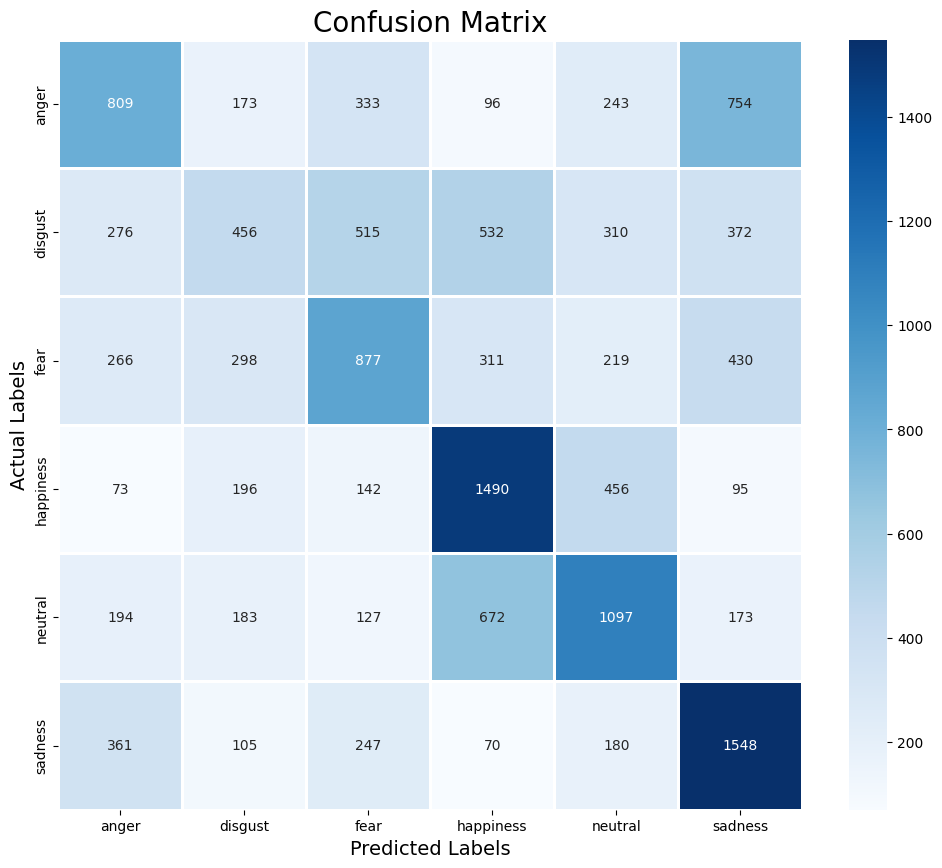

In [21]:
cm = confusion_matrix(y_test2, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [22]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.34      0.37      2408
     disgust       0.32      0.19      0.24      2461
        fear       0.39      0.37      0.38      2401
   happiness       0.47      0.61      0.53      2452
     neutral       0.44      0.45      0.44      2446
     sadness       0.46      0.62      0.53      2511

    accuracy                           0.43     14679
   macro avg       0.42      0.43      0.41     14679
weighted avg       0.42      0.43      0.41     14679



In [23]:
model.evaluate(x_test, y_test, batch_size=128)

115/115 [==============================] - 1s 8ms/step - loss: 1.5111 - accuracy: 0.4276


[1.5110784769058228, 0.4276176989078522]

In [24]:
# version2 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# loss: 0.6380 - accuracy: 0.7571 - val_loss: 1.7472 - val_accuracy: 0.4925 - lr: 0.0010
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 148, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 74, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 74, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 37, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 37, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 19, 128)         

In [25]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 12s 14ms/step - loss: 1.7195 - accuracy: 0.2467 - val_loss: 1.6539 - val_accuracy: 0.2917 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 9s 13ms/step - loss: 1.6548 - accuracy: 0.2850 - val_loss: 1.6216 - val_accuracy: 0.3038 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 9s 13ms/step - loss: 1.6291 - accuracy: 0.2997 - val_loss: 1.6067 - val_accuracy: 0.3147 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 9s 13ms/step - loss: 1.6072 - accuracy: 0.3161 - val_loss: 1.5744 - val_accuracy: 0.3381 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 9s 13ms/step - loss: 1.5820 - accuracy: 0.3270 - val_loss: 1.5518 - val_accuracy: 0.3489 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 9s 13ms/step - loss: 1.5580 - accuracy: 0.3418 - val_loss: 1.5383 - val_accuracy: 0.3578 - lr: 0.0010
Epoch 7/100
689/689 [==============================] - 9s

In [26]:
model.save("sound_classifier_model_MFCC_MEL(version2).h5")


In [30]:
# version3 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# loss: 0.6380 - accuracy: 0.7571 - val_loss: 1.7472 - val_accuracy: 0.4925 - lr: 0.0010
model=Sequential()
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=10, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=8, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=8, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 148, 64)           384       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 74, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 74, 128)           41088     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 37, 128)          0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 37, 128)           0         
                                                                 
 conv1d_16 (Conv1D)          (None, 37, 256)          

In [31]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 14s 17ms/step - loss: 1.7186 - accuracy: 0.2484 - val_loss: 1.6561 - val_accuracy: 0.2836 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 11s 17ms/step - loss: 1.6677 - accuracy: 0.2817 - val_loss: 1.6349 - val_accuracy: 0.3044 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 11s 16ms/step - loss: 1.6485 - accuracy: 0.2937 - val_loss: 1.6197 - val_accuracy: 0.3113 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 11s 16ms/step - loss: 1.6304 - accuracy: 0.3008 - val_loss: 1.6041 - val_accuracy: 0.3171 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 11s 16ms/step - loss: 1.6165 - accuracy: 0.3106 - val_loss: 1.5893 - val_accuracy: 0.3324 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 11s 16ms/step - loss: 1.6048 - accuracy: 0.3164 - val_loss: 1.5758 - val_accuracy: 0.3372 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [32]:
model.save("sound_classifier_model_MFCC_MEL(version3).h5")


In [ ]:
#지금까지는 version2가 가장 좋음

In [14]:
# version4 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# loss: 0.8214 - accuracy: 0.6723 - val_loss: 1.7176 - val_accuracy: 0.4564 - lr: 0.0010
model=Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 148, 512)          3072      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 74, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 74, 256)           655616    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 19, 128)          0

In [15]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 19s 15ms/step - loss: 1.7921 - accuracy: 0.1664 - val_loss: 1.7919 - val_accuracy: 0.1670 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 10s 14ms/step - loss: 1.7919 - accuracy: 0.1633 - val_loss: 1.7920 - val_accuracy: 0.1636 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 10s 14ms/step - loss: 1.7913 - accuracy: 0.1699 - val_loss: 1.7928 - val_accuracy: 0.1784 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 10s 14ms/step - loss: 1.7330 - accuracy: 0.2414 - val_loss: 1.6856 - val_accuracy: 0.2783 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 10s 14ms/step - loss: 1.6914 - accuracy: 0.2705 - val_loss: 1.6596 - val_accuracy: 0.2866 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 10s 15ms/step - loss: 1.6691 - accuracy: 0.2836 - val_loss: 1.6458 - val_accuracy: 0.2997 - lr: 0.0010
Epoch 7/100
689/689 [==============================]

In [16]:
model.save("sound_classifier_model_MFCC_MEL(version4).h5")


In [13]:
# version5 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.5905 - accuracy: 0.7773 - val_loss: 1.7939 - val_accuracy: 0.5006 - lr: 0.0010
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 148, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 74, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 74, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 19, 128)          0

In [14]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 18s 13ms/step - loss: 1.7142 - accuracy: 0.2461 - val_loss: 1.6272 - val_accuracy: 0.3019 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 9s 13ms/step - loss: 1.6376 - accuracy: 0.2980 - val_loss: 1.6025 - val_accuracy: 0.3203 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 8s 12ms/step - loss: 1.6023 - accuracy: 0.3201 - val_loss: 1.5707 - val_accuracy: 0.3351 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 8s 12ms/step - loss: 1.5747 - accuracy: 0.3336 - val_loss: 1.5545 - val_accuracy: 0.3487 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 8s 12ms/step - loss: 1.5472 - accuracy: 0.3504 - val_loss: 1.5220 - val_accuracy: 0.3617 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 8s 12ms/step - loss: 1.5266 - accuracy: 0.3587 - val_loss: 1.5196 - val_accuracy: 0.3620 - lr: 0.0010
Epoch 7/100
689/689 [==============================] - 8s

In [15]:
model.save("sound_classifier_model_MFCC_MEL(version5).h5")


In [18]:
# version6 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.5183 - accuracy: 0.8042 - val_loss: 2.3034 - val_accuracy: 0.4687 - lr: 0.0010
model=Sequential()
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=10, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=8, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=8, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 148, 512)          3072      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 74, 512)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 74, 256)           655616    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 37, 256)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 37, 128)           163968    
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 19, 128)         

In [17]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 13s 15ms/step - loss: 1.7294 - accuracy: 0.2382 - val_loss: 1.6629 - val_accuracy: 0.2859 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 10s 14ms/step - loss: 1.6765 - accuracy: 0.2755 - val_loss: 1.6613 - val_accuracy: 0.2837 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 10s 14ms/step - loss: 1.6511 - accuracy: 0.2916 - val_loss: 1.6366 - val_accuracy: 0.2991 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 10s 15ms/step - loss: 1.6323 - accuracy: 0.2999 - val_loss: 1.6157 - val_accuracy: 0.3145 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 10s 14ms/step - loss: 1.6162 - accuracy: 0.3128 - val_loss: 1.5951 - val_accuracy: 0.3233 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 9s 14ms/step - loss: 1.6032 - accuracy: 0.3214 - val_loss: 1.5886 - val_accuracy: 0.3248 - lr: 0.0010
Epoch 7/100
689/689 [==============================] 

In [1]:
# version7 - epoch 100
# factor=0.4, verbose=0, patience=5, min_lr=0.0000001
# randomstate = 42
# loss: 0.6379 - accuracy: 0.7575 - val_loss: 1.7023 - val_accuracy: 0.4940 - lr: 0.0010
model=Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

NameError: name 'Sequential' is not defined

In [20]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=5, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
689/689 [==============================] - 14s 17ms/step - loss: 1.7244 - accuracy: 0.2367 - val_loss: 1.6604 - val_accuracy: 0.2915 - lr: 0.0010
Epoch 2/100
689/689 [==============================] - 10s 15ms/step - loss: 1.6491 - accuracy: 0.2886 - val_loss: 1.6225 - val_accuracy: 0.3163 - lr: 0.0010
Epoch 3/100
689/689 [==============================] - 10s 15ms/step - loss: 1.6124 - accuracy: 0.3167 - val_loss: 1.5748 - val_accuracy: 0.3345 - lr: 0.0010
Epoch 4/100
689/689 [==============================] - 10s 15ms/step - loss: 1.5869 - accuracy: 0.3278 - val_loss: 1.5902 - val_accuracy: 0.3329 - lr: 0.0010
Epoch 5/100
689/689 [==============================] - 10s 15ms/step - loss: 1.5675 - accuracy: 0.3407 - val_loss: 1.5431 - val_accuracy: 0.3591 - lr: 0.0010
Epoch 6/100
689/689 [==============================] - 10s 15ms/step - loss: 1.5445 - accuracy: 0.3519 - val_loss: 1.5234 - val_accuracy: 0.3677 - lr: 0.0010
Epoch 7/100
689/689 [==============================]